# Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.array([2,4,6,8])
y = np.array([0,0,1,1])

x = np.column_stack((np.ones_like(x1),x1))
y = y.reshape(-1,1) # need only one column...no rows

# hyperparameters
steps = 1000
lr = 0.1
m,n = x.shape

theta = np.zeros((n,1)) # n = 2
costs = [] # keep track of cost at each iteration

In [2]:
def sigmd(z):
  z = np.clip(z,-500,500) # clipping the z values b/w -500 and 500, for computaitonal stability
  return 1/(1+np.exp(-z))


In [3]:
# GD loop
for i in range(steps):
  z = x @ theta
  h = sigmd(z)
  gradient = (1/m) * (x.T @ (h-y))
  theta = theta - (lr*gradient)

  eps = 1e-10 # to avoid log(0) i.e negative infinite
  cost = (-1/m) * np.sum((y*np.log(h+eps)) + ((1-y)*np.log(1-h+eps)))
  costs.append(cost)

  print(f"step {i} | theta = {theta.ravel()} | cost = {cost:.4f}")

step 0 | theta = [0.  0.1] | cost = 0.6931
step 1 | theta = [-0.01210381  0.12779619] | cost = 0.6299
step 2 | theta = [-0.02700593  0.13889935] | cost = 0.6229
step 3 | theta = [-0.04275972  0.14470718] | cost = 0.6197
step 4 | theta = [-0.05877699  0.14863171] | cost = 0.6169
step 5 | theta = [-0.07485312  0.15185562] | cost = 0.6142
step 6 | theta = [-0.09091332  0.15481127] | cost = 0.6115
step 7 | theta = [-0.10692973  0.15766012] | cost = 0.6089
step 8 | theta = [-0.122892  0.160463] | cost = 0.6062
step 9 | theta = [-0.13879634  0.16324295] | cost = 0.6036
step 10 | theta = [-0.15464142  0.16600875] | cost = 0.6010
step 11 | theta = [-0.17042689  0.16876373] | cost = 0.5984
step 12 | theta = [-0.18615275  0.17150918] | cost = 0.5958
step 13 | theta = [-0.20181913  0.17424561] | cost = 0.5933
step 14 | theta = [-0.21742621  0.17697321] | cost = 0.5908
step 15 | theta = [-0.23297422  0.17969208] | cost = 0.5883
step 16 | theta = [-0.24846336  0.18240226] | cost = 0.5858
step 17 | 

In [4]:
print('✅ theta:',theta.ravel())
print('✅ Cost:',cost)

✅ theta: [-5.98319609  1.25521324]
✅ Cost: 0.1410916692216876


In [5]:
# prediction on training data
train_probability = sigmd(x @ theta)
train_pred = (train_probability >= 0.5).astype(int)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128128 (\N{SKULL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


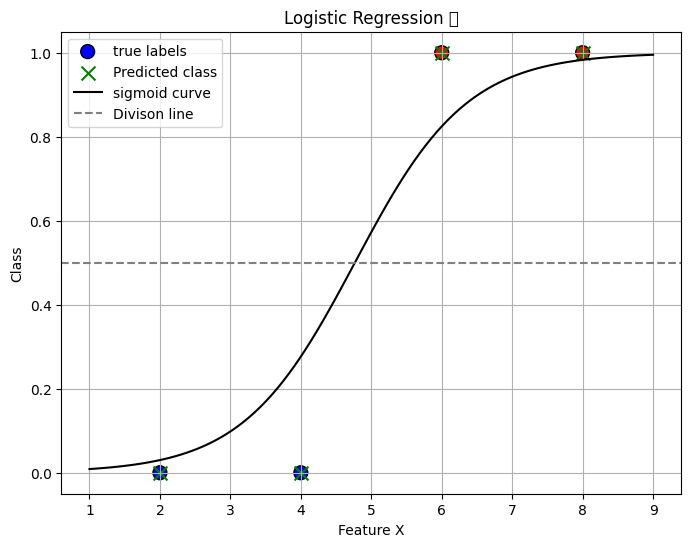

In [7]:
# the plot
plt.figure(figsize=(8,6))

plt.scatter(x1,y.ravel(), c=y.ravel(), cmap = 'bwr', s = 100, edgecolor = 'k', label = 'true labels')
plt.scatter(x1,train_pred.ravel(), marker = 'x', color = 'green',s = 100, label = 'Predicted class')

x_val = np.linspace(1,9,100) # creates 100 evenly spaced numbers b/w 1 and 9
x_plot = np.column_stack((np.ones_like(x_val),x_val))
pred_prob = sigmd(x_plot @ theta) # prediction probability

plt.plot(x_val,pred_prob,color='black', label = 'sigmoid curve') # the s-shaped sigmoid curve
plt.axhline(0.5, linestyle = '--', color = 'grey', label = 'Divison line') # the dividing line of classes

plt.xlabel('Feature X')
plt.ylabel('Class')
plt.title('Logistic Regression 💀')
plt.grid(True)
plt.legend()
plt.show()